In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import pandas_datareader as pdr
import datetime as dt

# <font face="gotham" color="purple"> Pandas-datareader</font>

From here on, we will practice on real data via ```pandas-datareader``` which is library for retrieving data from various databases, such as FRED, World Bank, Stooq, and etc. 

Let's take a quick look how to use it.

##  <font face="gotham" color="purple"> FRED</font>

Federal Reserve Economic Data (FRED) is a database maintained by the Research division of the Federal Reserve Bank of St. Louis that has more than 765,000 economic time series from 96 sources. For macroeconomic researches, this is the database you need almost every day.

In [9]:
class Data:
    def __init__(self, **kwargs):
        '''Input start, end, database'''
        self.__dict__.update(kwargs)
#         self.start = start
#         self.end = end
#         self.database = database 
    
    def retrieve(self, data_id):
        if self.database == 'fred':
            self.df = pdr.data.DataReader(data_id, self.database , start, end)
        elif self.database == 'oecd':
            self.df = pdr.data.DataReader(data_id, self.database)
        elif self.database == 'eurostat':
            self.df = pdr.data.DataReader(data_id, self.database)
        
    def normalise(self):
        self.df_normalised = self.df/self.df.iloc[1]
            
    def plot(self, labels, grid_on, norm):
        if norm == False:
            self.labels = labels
            self.grid_on = grid_on
            
            fig, ax = plt.subplots(figsize=(14, 8))
            for col, label in zip(self.df, self.labels):  # for drawing multiple labels/legends
                ax.plot(self.df_normalised[col], label=label)
            ax.grid(grid_on)
            ax.legend()
            plt.show()
        else:
            self.label = labels
            self.grid_on = grid_on
            
            fig, ax = plt.subplots(figsize=(14, 8))
            for col, label in zip(self.df_normalised, self.label):
                ax.plot(self.df_normalised[col], label=label)
            ax.legend()
            ax.grid(grid_on)
            plt.show()
            
    def twin_plot(self, lhs, rhs, labels, grid_on, ax_rhs_inverse, lhs_color, rhs_color):
        self.lhs = lhs
        self.rhs = rhs
        self.labels = labels
        self.grid_on = grid_on
        self.ax_rhs_inverse = ax_rhs_inverse
        self.lhs_color = lhs_color
        self.rhs_color = rhs_color
        
        fig, ax = plt.subplots(figsize=(14, 8))
        ax.plot(self.df[self.lhs].dropna(), label=labels[0], color = self.lhs_color)
        ax.legend(loc=3)
        ax_RHS = ax.twinx() # share the same x-axis
        ax_RHS.plot(self.df[self.rhs].dropna(), label=labels[1], color = self.rhs_color)
        ax_RHS.legend(loc=0)
        if ax_rhs_inverse == True:
            ax_RHS.invert_yaxis()
        ax.grid(grid_on)
        plt.show()

###  <font face="gotham" color="purple"> Stock Index Plot</font>

In [10]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021, 7, 1)
fred_stock = Data(start = start, end = end, database = 'fred')
fred_stock.retrieve(['NASDAQCOM','SP500','DJIA'])

In [11]:
fred_stock.df.head(5)

,NASDAQCOM,SP500,DJIA
DATE,,,
2015-01-01,NaN,NaN,NaN
2015-01-02,4726.81,2058.20,17832.99
2015-01-05,4652.57,2020.58,17501.65
2015-01-06,4592.74,2002.61,17371.64
2015-01-07,4650.47,2025.90,17584.52


In [5]:
fred_stock.normalise()
fred_stock.df_normalised.head(5)

,NASDAQCOM,SP500,DJIA
DATE,,,
2015-01-01,NaN,NaN,NaN
2015-01-02,1.000000,1.000000,1.000000
2015-01-05,0.984294,0.981722,0.981420
2015-01-06,0.971636,0.972991,0.974129
2015-01-07,0.983850,0.984307,0.986067


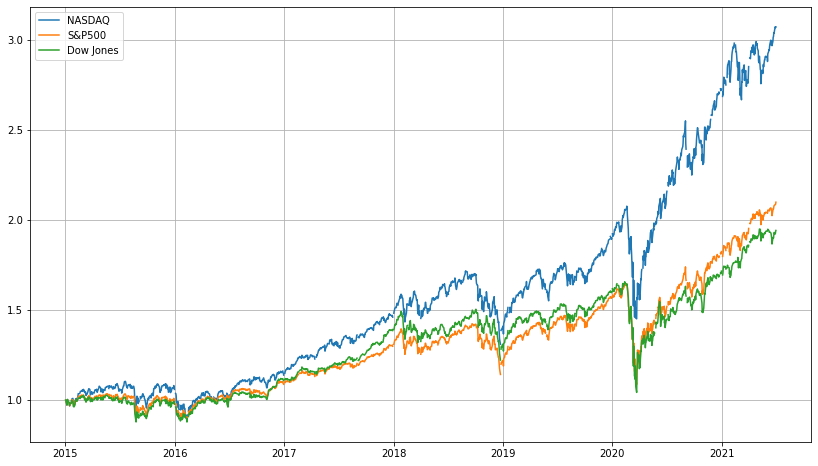

In [6]:
fred_stock.plot(labels=['NASDAQ','S&P500','Dow Jones'], grid_on=True, norm=True)

###  <font face="gotham" color="purple"> Exchange Rate Plot</font>

In [7]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021, 7, 1)
fx = Data(start = start, end = end, database = 'fred')
fx.retrieve(['DEXCHUS','DEXJPUS', 'DEXUSEU']) # 'USD/CNY','USD/JPY','EUR/USD'

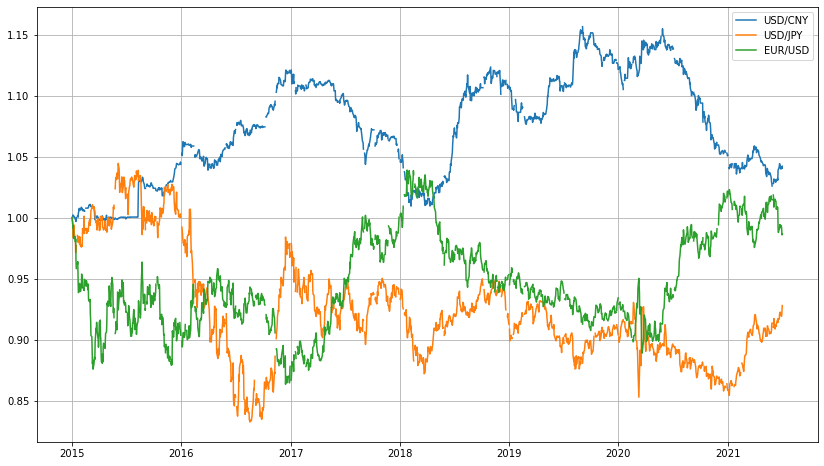

In [8]:
fx.normalise()
fx.plot(labels=['USD/CNY','USD/JPY','EUR/USD'], grid_on=True, norm=True)

###  <font face="gotham" color="purple"> Twin Axes Plot</font>

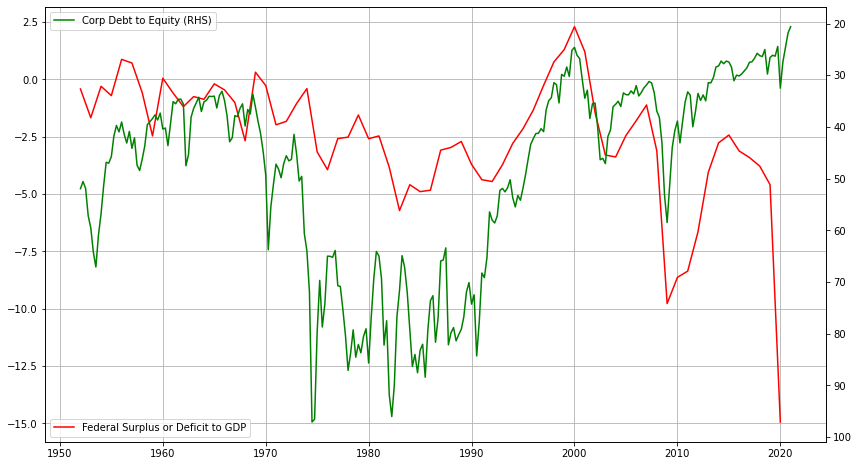

In [9]:
start = dt.datetime(1952, 1, 1)
end = dt.datetime.today()
debt = Data(start = start, end = end, database = 'fred')
debt.retrieve(['FYFSGDA188S','NCBCMDPMVCE'])
debt.twin_plot(lhs = 'FYFSGDA188S', rhs = 'NCBCMDPMVCE',
               labels = ['Federal Surplus or Deficit to GDP', 'Corp Debt to Equity (RHS)'], 
               grid_on = True, ax_rhs_inverse = True, 
               lhs_color = 'r', rhs_color = 'g')

##  <font face="gotham" color="purple"> OECD</font>

In [ ]:
oecd = Data(start = start, end = end, database = 'oecd')
oecd.retrieve('EDU_GRAD_AGE')

In [ ]:
wb.df.columns

In [ ]:
wb.df[['Japan', 'United States']]

In [ ]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

In [ ]:
eurostat = Data(database = 'eurostat')
eurostat.retrieve('tran_sf_railac')

# <font face="gotham" color="purple"> Two Independent Variable Regression</font>

The regression model with two independent variables are often the representative pedagogic tool of multiple linear regression. We start from here too, here is the model:
$$
Y_{i}=\beta_{1}+\beta_{2} X_{2 i}+\beta_{3} X_{3 i}+u_{i}
$$
$X_{2 i}$ and $X_{3 i}$ are the indexed independent variables. 

Without disturbance term, the model is merely a function of a plane in $\mathbb{R}^3$, such as
$$
Y = 1 + 2X_2 + 3X_3
$$
We can visualise the plane and data points.

In [5]:
x2, x3 = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X2, X3 = np.meshgrid(x2, x3) # this is coordinates on X2-X3 plane
u = np.random.randn(7, 7)*3
Y = 1 + 2*X2 + 3*X3 # plane without disturbance term
Yu = 1 + 2*X2 + 3*X3 + u # with disturbance term

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('$Y=1+2X_2+3X_3$', size = 18)
ax.view_init(elev=30, azim=20)
ax.plot_surface(X2, X3, Y, cmap ='viridis', alpha=.5) # MATLAB default color map
ax.scatter(X2, X3, Yu, s = 100)

for i in range(len(X2.flatten())):
    ax.plot([X2.flatten()[i],X2.flatten()[i]], [X3.flatten()[i],X3.flatten()[i]], [Y.flatten()[i], Yu.flatten()[i]])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>Side Note:</b><br>
Matplotlib isn't able to draw real 3D plot, all the 3D plots are actually 2D projections. Too draw serious 3D graphs, <code>mayavi</code> and <code>plotly</code> are the better choices.
</div> 

The formulae of $b_1$, $b_2$ and $b_3$ are presented here without proofs 
\begin{align}
b_{1}&=\bar{Y}-b_{2} \bar{X}_{2}-b_{3} \bar{X}_{3}\\
b_{2}&=\frac{\operatorname{Cov}\left(X_{2}, Y\right) \operatorname{Var}\left(X_{3}\right)-\operatorname{Cov}\left(X_{3}, Y\right) \operatorname{Cov}\left(X_{2}, X_{3}\right)}{\operatorname{Var}\left(X_{2}\right) \operatorname{Var}\left(X_{3}\right)-\left[\operatorname{Cov}\left(X_{2}, X_{3}\right)\right]^{2}}\\
b_{3}&=\frac{\operatorname{Cov}\left(X_{3}, Y\right) \operatorname{Var}\left(X_{2}\right)-\operatorname{Cov}\left(X_{2}, Y\right) \operatorname{Cov}\left(X_{3}, X_{2}\right)}{\operatorname{Var}\left(X_{3}\right) \operatorname{Var}\left(X_{2}\right)-\left[\operatorname{Cov}\left(X_{3}, X_{2}\right)\right]^{2}}
\end{align}
The algebraic expressions are becoming exponentially burdensome as number of variables rises, therefore we won't even try to reproduce the derivation. But the general idea is always the same despite of number of independent variables—taking partial derivatives towards all $b$'s
$$
\begin{gathered}
\frac{\partial R S S}{\partial b_{1}}=-2 \sum_{i=1}^{n}\left(Y_{i}-b_{1}-b_{2} X_{2 i}-b_{3} X_{3 i}\right)=0 \\
\frac{\partial R S S}{\partial b_{2}}=-2 \sum_{i=1}^{n} X_{2 i}\left(Y_{i}-b_{1}-b_{2} X_{2 i}-b_{3} X_{3 i}\right)=0 \\
\frac{\partial R S S}{\partial b_{3}}=-2 \sum_{i=1}^{n} X_{3 i}\left(Y_{i}-b_{1}-b_{2} X_{2 i}-b_{3} X_{3 i}\right)=0
\end{gathered}
$$

## <font face="gotham" color="purple"> Cobb-Douglas Production Function </font>

The multiple regression coefficients represent each $X$'s influence on $Y$ while controlling all other $X$ variables. We will use the celebrated Cobb–Douglas (C-D) production function to demonstrate how this holds. The stochastic C-D function form is
$$
Y_i = A L_i^\beta K_i^\alpha e^{u_i}
$$
where $Y$ stands for output, $A$ for technology, $L$ for labor input, $K$ for capital input. And from lecture 2, we have known that $\alpha$ and $\beta$ are output elasticities of labor input and capital input. Take natural log, 
$$
\ln{Y_i} = \ln{A} + \beta \ln{L_i}+\alpha\ln{K_i} + u_i
$$
Estimation of $\alpha$ and $\beta$  gives information about _returns to scale_, i.e.
$$
\alpha+\beta = 1 \qquad \text{Constant returns to scale}\\
\alpha+\beta < 1 \qquad \text{Decreasing returns to scale}\\
\alpha+\beta > 1 \qquad \text{Increasing returns to scale}
$$

Import the data, which is from _Annual Survey of Manufacturers 2005_. 

In [55]:
df = pd.read_excel('Basic_Econometrics_practice_data.xlsx', sheet_name = 'US_CobbDauglas')
df.head()

,Area,Output Value Added (thousands of $),Labour Input Worker Hours (thousands),Capital Input (thousands)
0,Alabama,38372840,424471,2689076
1,Alaska,1805427,19895,57997
2,Arizona,23736129,206893,2308272
3,Arkansas,26981983,304055,1376235
4,California,217546032,1809756,13554116


The data record output, labor input and capital input from each states in 2005, enough for demonstration purpose. Let's take natural log of the data and change the columns' names. 

In [56]:
df = df[df.columns[1:4]] # pick the data columns
df = np.log(df) # take log on the data
df.head()

,Output Value Added (thousands of $),Labour Input Worker Hours (thousands),Capital Input (thousands)
0,17.462860,12.958599,14.804708
1,14.406308,9.898224,10.968147
2,16.982509,12.239957,14.652010
3,17.110680,12.624964,14.134862
4,19.197921,14.408703,16.422201


In [57]:
df.columns = ['ln_Y', 'ln_L', 'ln_K'] # change the names
df.head()

,ln_Y,ln_L,ln_K
0,17.462860,12.958599,14.804708
1,14.406308,9.898224,10.968147
2,16.982509,12.239957,14.652010
3,17.110680,12.624964,14.134862
4,19.197921,14.408703,16.422201


Now perform the OLS estimation.

In [58]:
X = df[['ln_L', 'ln_K']]
Y = df['ln_Y']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit() 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     645.9
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           2.00e-35
Time:                        18:25:09   Log-Likelihood:                -3.4267
No. Observations:                  51   AIC:                             12.85
Df Residuals:                      48   BIC:                             18.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8876      0.396      9.812      0.0

Here are the estimated elasticities

In [59]:
print('alpha: {:.4f}    beta: {:.4f}'.format(model.params[2], model.params[1]))

alpha: 0.5213    beta: 0.4683


It means, ceteris paribus, $1\%$ raise of capital input led on $.52\%$ increase in output, $1\%$ raise of labor input led on $.47%$ increase in output.

Adding up the elasticities gives the parameter of returns to scale $.99$, given possible statistical errors, we could conclude a constant return to scale.

In [60]:
np.sum(model.params[2]+model.params[1])

0.9896113184066175

## <font face="gotham" color="purple"> Regression With Purged Variables</font>

What we want to demonstrate is that the multiple regression coefficients represent only the influence of their own variable, even though we purge the influence of other variables, the estimates are expected to be the same in multiple regression.

To purge the influence of $\ln{L}$ on $\ln{Y}$ and $\ln{K}$, we evaluate two regression models as below


$$
\ln{Y_i} = \gamma_1 + \gamma_2 \ln{L_i}+u^Y_i\\
\ln{K_i}= \zeta_1 + \zeta_2\ln{L_i}+v^K_i
$$

Perform the OLS estimation with ```statsmodels```.

In [61]:
ln_K = df['ln_K']
ln_L = df['ln_L']
ln_Y = df['ln_Y']

ln_L = sm.add_constant(ln_L) # adding a constant

model1 = sm.OLS(ln_Y, ln_L).fit()
model2 = sm.OLS(ln_K, ln_L).fit()


Next we retrieve the residual of both estimation, i.e. $\ln{Y_i}^{resid}$ and $\ln{K_i}^{resid}$, which are free of $\ln{L}$'s influence, the exact reason we call them 'purged'. 
$$
\ln{Y_i}^{resid}=\ln{Y_i}-\widehat{\ln{Y_i}} \\
\ln{K_i}^{resid}=\ln{K_i}-\widehat{\ln{K_i}} 
$$
Then regress $e^Y$ on $e^K$

In [62]:
ln_Y_resid = model1.resid
ln_K_resid = model2.resid

model3 = sm.OLS(ln_Y_resid, ln_K_resid).fit()
model3.params

x1    0.521279
dtype: float64

The estimate is exactly the same as in multiple regression.

u = # <font face="gotham" color="purple"> Confidence Ellipse</font>

In [79]:
X2 = np.linspace(10, 100, 30)
X3 = X2*10+

array([ 10.        ,  13.10344828,  16.20689655,  19.31034483,
        22.4137931 ,  25.51724138,  28.62068966,  31.72413793,
        34.82758621,  37.93103448,  41.03448276,  44.13793103,
        47.24137931,  50.34482759,  53.44827586,  56.55172414,
        59.65517241,  62.75862069,  65.86206897,  68.96551724,
        72.06896552,  75.17241379,  78.27586207,  81.37931034,
        84.48275862,  87.5862069 ,  90.68965517,  93.79310345,
        96.89655172, 100.        ])

# <font face="gotham" color="purple"> Multicollinearity</font>

It is common that variables are correlated with each other to some extent, for instance in Cobb-Douglas model, higher labor input might induce higher capital investment, because each labor requires some level of capital to produce. On the other hand, higher capital investment also requires more labor input, e.g. if office buildings are constructed, there will be more recruitment.

This phenomenon of correlated independent variables is termed **multicollinearity**.

But is multicollinearity desirable? _Hardly_.

In two variable regression case, the standard error of $b_2$ is
$$
\text { s.e. }\left(b_{2}\right)=\sqrt{\frac{s_{u}^{2}}{n \operatorname{Var}\left(X_{2}\right)} \times \frac{1}{1-r_{X_{2}, X_{3}}^{2}}}
$$

If you can recall the formula of single regression model, the difference is the part 
$$\sqrt{\frac{1}{1-r^2_{X_2, X_3}}}$$
where $r^2_{X_2, X_3}$ is the correlation coefficient. 

If hold other things constant, the larger the correlation, the smaller the denominator, then standard error is larger. This the exactly the reason we see multicollinearity as an undesirable feature. 

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>Perfect Multicollinearity</b><br><br>
And you probably have noticed there is a condition $r^2_{X_2, X_3}=1$ that makes the whole standard error formula invalid, this applies to any type of linear regression model, if any two independent variables perfectly correlated, the model will be invalid and can't be estimated either.<br><br>
    
Not only two variable cases, in the multiple regression, an independent variable might be a <a href='https://nbviewer.jupyter.org/github/WeijieChen-MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%206%20-%20Linear%20Combination.ipynb'>linear combination</a> of some other variables. It's would be arduous work to detect where correlations originate, because  pairwise correlation might seem totally normal.
</div>

Let's load the Cobb-Dauglas data again without log transformation. And compute correlation coefficient

In [77]:
df = pd.read_excel('Basic_Econometrics_practice_data.xlsx', sheet_name = 'US_CobbDauglas')
df = df[df.columns[1:4]] # pick the data columns
df.columns = ['Y', 'L', 'K']
np.corrcoef(df['L'], df['K'])

array([[1.        , 0.94201238],
       [0.94201238, 1.        ]])

It's not a surprise to see high correlation $.94$ between capital and labor, but the high correlation does not necessarily lead to poor estimates, as long as other factors are well-controlled, such as _large variance of independent variables_, _small variance of disturbance term_ and _large sample size_. 

We only talk about multicollinearity explicitly when independent variables are highly correlated and one or more of conditions above are also obstructive. 

Once you suspect multicollinearity presents, you should expect the following consequences.

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>Consequences of Multicollinearity</b><br><br>
1. Wider confidence interval<br>
2. Insignificant $t$-statistic<br>
3. Though some $t$-statistic might be insignificant, but the $R^2$ can be misleadingly high<br>
4. Any data change might cause drastic estimation result
</div>

The third consequence can be seen as an alert, especially when the estimation reports very few significant $t$-statistics, but $R^2$ are exceedingly high, this is a signal of severe multicollinearity. 

The forth consequences suggests that the estimated results are highly sensitive to data, even a minor change of single data point can cause erratic results.